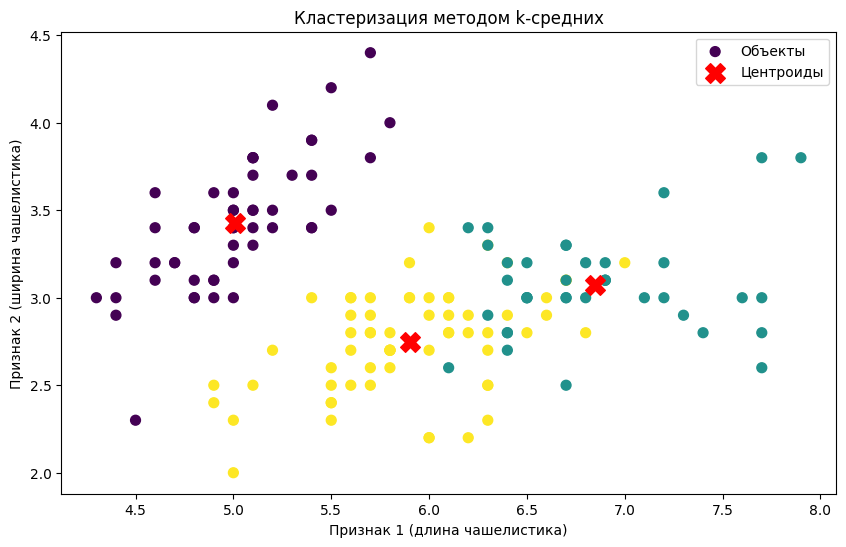

In [3]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Функция для вычисления евклидова расстояния между двумя точками
def euclidean_distance(point1, point2):
    """
    Вычисляет евклидово расстояние между двумя точками.
    point1 и point2 — это массивы чисел (признаки объектов).
    """
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Функция для инициализации центроидов
def initialize_centroids(X, k):
    """
    Инициализирует k центроидов случайным выбором из данных.
    X — матрица признаков (n_samples, n_features).
    k — количество кластеров.
    """
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Функция для назначения объектов кластерам
def assign_clusters(X, centroids):
    """
    Назначает каждый объект ближайшему центроиду.
    X — матрица признаков (n_samples, n_features).
    centroids — текущие центроиды.
    Возвращает метки кластеров для каждого объекта.
    """
    labels = np.zeros(X.shape[0])
    for i, x in enumerate(X):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        labels[i] = np.argmin(distances)
    return labels

# Функция для обновления центроидов
def update_centroids(X, labels, k):
    """
    Обновляет центроиды как среднее значение объектов в кластере.
    X — матрица признаков (n_samples, n_features).
    labels — метки кластеров для каждого объекта.
    k — количество кластеров.
    Возвращает новые центроиды.
    """
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

# Функция для реализации алгоритма k-средних
def k_means(X, k, max_iters=100):
    """
    Реализация алгоритма k-средних.
    X — матрица признаков (n_samples, n_features).
    k — количество кластеров.
    max_iters — максимальное количество итераций.
    Возвращает центроиды и метки кластеров.
    """
    # Инициализация центроидов
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        # Назначение объектов кластерам
        labels = assign_clusters(X, centroids)
        
        # Обновление центроидов
        new_centroids = update_centroids(X, labels, k)
        
        # Проверка на сходимость
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

# Загрузка набора данных "Ирисы"
iris = load_iris()
X = iris.data  # Признаки (длина и ширина чашелистика и лепестка)
y = iris.target  # Метки классов (для визуализации)

# Применение алгоритма k-средних
k = 3  # Количество кластеров
centroids, labels = k_means(X, k)

# Визуализация результатов
plt.figure(figsize=(10, 6))

# Отображение объектов
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label="Объекты")

# Отображение центроидов
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Центроиды")

plt.title("Кластеризация методом k-средних")
plt.xlabel("Признак 1 (длина чашелистика)")
plt.ylabel("Признак 2 (ширина чашелистика)")
plt.legend()
plt.show()